In [1]:
import pygimli as pg
from pygimli.physics import ert  # the module
import numpy as np
import pygimli.meshtools as mt

05/08/21 - 11:36:00 - pyGIMLi - INFO - Found 1 regions.
05/08/21 - 11:36:01 - pyGIMLi - INFO - Found 1 regions.
05/08/21 - 11:36:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/08/21 - 11:36:01 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
05/08/21 - 11:36:12 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/08/21 - 11:36:12 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


(<matplotlib.axes._subplots.AxesSubplot at 0x1c45c5b38b0>,
 <matplotlib.colorbar.Colorbar at 0x1c45c648760>)

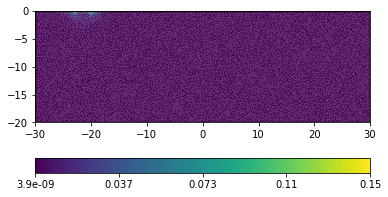

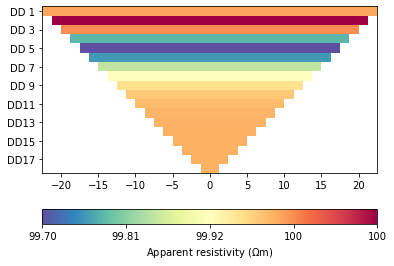

In [2]:
data = ert.load("simple.dat")
rhos = data['rhoa']

ert1 = ert.ERTManager(data)
world2 = mt.createWorld(start=[-30, 0], end=[30, -20], marker=2, worldMarker=True)
for pos in data.sensorPositions():
    world2.createNode(pos)

mesh = mt.createMesh(world2, area=.2, quality=33, marker=2)


ert1.setMesh(mesh)  

rhomap = [[2, 100]]
rhomodel = pg.solver.parseArgToArray(rhomap, mesh.cellCount(), mesh)
fob = ert.ERTModelling()
fob.setData(data)
fob.setMesh(mesh)
dr = fob.response(rhomodel)
fob.createJacobian(rhomodel)
J = fob.jacobian()
J = pg.utils.gmat2numpy(J)
pg.show(ert1.fop.paraDomain, (abs(J[0,:])))
ert.showERTData(data, vals=dr)

(<matplotlib.axes._subplots.AxesSubplot at 0x1c48c2d6910>,
 <matplotlib.colorbar.Colorbar at 0x1c48b7ffa00>)

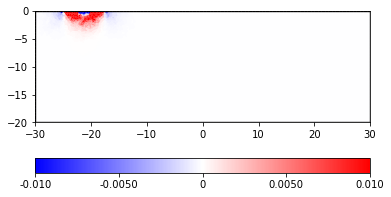

In [5]:
pg.show(ert1.fop.paraDomain, J[0,:], cMin=-0.01, cMax=0.01, cMap="bwr")

Mesh: Nodes: 5321 Cells: 10358 Boundaries: 15678 Mesh: Nodes: 5321 Cells: 10358 Boundaries: 15678


(<matplotlib.axes._subplots.AxesSubplot at 0x1c493e38eb0>,
 <matplotlib.colorbar.Colorbar at 0x1c493e33eb0>)

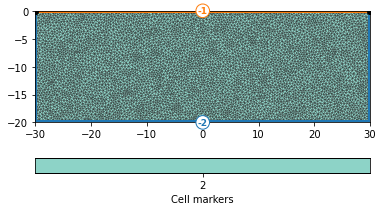

In [10]:
grid = pg.meshtools.appendTriangleBoundary(mesh, marker=1,
                                           xbound=250, ybound=250)
print(mesh, grid)
pg.show(grid, markers=True, showMesh=True)

03/06/21 - 14:37:15 - pyGIMLi - INFO - Found 2 regions.
03/06/21 - 14:37:15 - pyGIMLi - INFO - Region with smallest marker (1) set to background
03/06/21 - 14:37:17 - pyGIMLi - INFO - Found 2 regions.
03/06/21 - 14:37:17 - pyGIMLi - INFO - Region with smallest marker (1) set to background
03/06/21 - 14:37:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
03/06/21 - 14:37:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
03/06/21 - 14:37:27 - pyGIMLi - INFO - Creating forward mesh from region infos.
03/06/21 - 14:37:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
C:\Users\hangchen\Anaconda3\envs\pg\lib\site-packages\pygimli\viewer\mpl\colorbar.py:448: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("virid

(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x27a8609c3c8>)

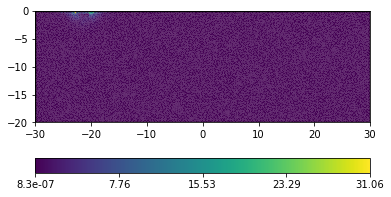

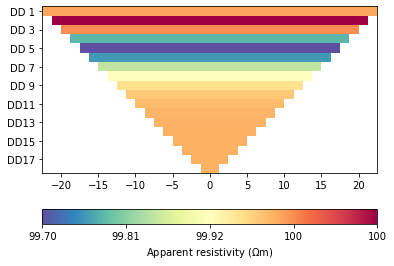

In [10]:
ert1.setMesh(grid)  
rhomap = [[1, 100],[2, 100]]
rhomodel = pg.solver.parseArgToArray(rhomap, grid.cellCount(), grid)
fob = ert.ERTModelling()
fob.setData(data)
fob.setMesh(grid)
dr = fob.response(rhomodel)
fob.createJacobian(rhomodel)
J2 = fob.jacobian()
J2 = pg.utils.gmat2numpy(J2)
pg.show(ert1.fop.paraDomain, (abs(J2[0,:])))
ert.showERTData(data, vals=dr)

In [11]:
print(pg.__version__)

1.1.1+5.gc107727a
